<a href="https://colab.research.google.com/github/mulkihakim/PCVK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gamma Correction

Gamma Correction pada citra
---------------------------------
Masukkan nilai Gamma: 3


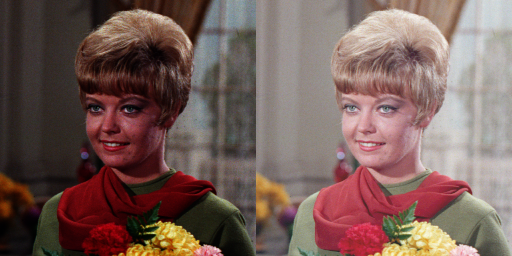

In [1]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Gamma Correction pada citra')
print('---------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/female.tiff')
# Normalisasi citra (diubah menjadi rentang [0, 1])
normalized_img = original / 255.0

# Melakukan Gamma Correction: I_out = I_in ^ (1/gamma)
gamma_corrected = np.power(normalized_img, 1.0 / gamma)

# Kembalikan ke rentang [0, 255]
gamma_corrected = np.uint8(gamma_corrected * 255)

# Gabungkan gambar asli dan hasil gamma correction untuk ditampilkan
final_frame = cv.hconcat([original, gamma_corrected])

# Menampilkan gambar
cv2_imshow(final_frame)



Simulasi Image Depth

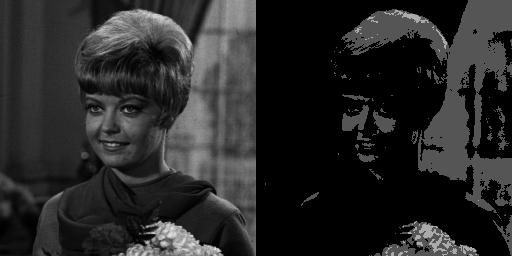

In [9]:
# Simulasi pengurangan bit depth
bit_depth = 2  # Nilai bit depth yang diinginkan
level = 255 / (pow(2, bit_depth) - 1)  # Menghitung level warna berdasarkan bit depth

# Membaca citra asli dalam grayscale
original_grayscale = cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)

# Inisialisasi citra hasil depth reduction
depth_image = np.zeros(original_grayscale.shape, original_grayscale.dtype)

# Melakukan simulasi image depth
depth_image = np.floor(original_grayscale / level) * level

# Pastikan kedua gambar memiliki tipe data yang sama
depth_image = depth_image.astype(original_grayscale.dtype)

# Tampilkan gambar asli dan gambar dengan simulasi depth
final_frame = cv.hconcat([original_grayscale, depth_image])
cv2_imshow(final_frame)

Average Denoising

Jumlah Averaging: 5, PSNR: 27.54 dB


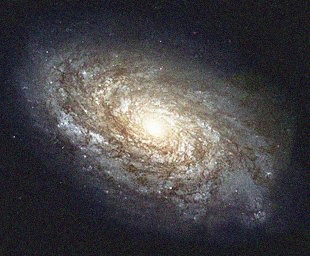

Jumlah Averaging: 10, PSNR: 27.55 dB


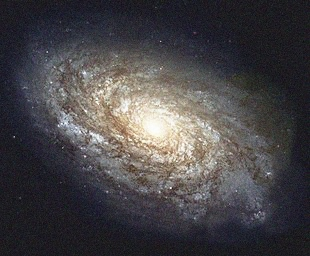

Jumlah Averaging: 20, PSNR: 27.52 dB


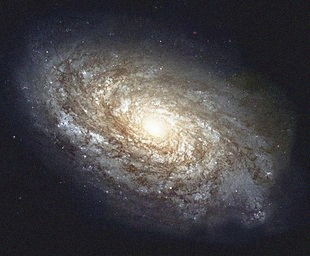

Jumlah Averaging: 40, PSNR: 27.45 dB


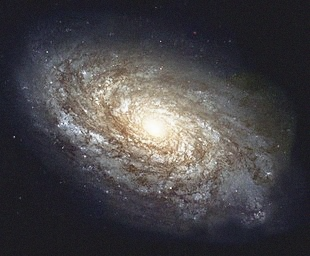

Jumlah Averaging: 80, PSNR: 27.40 dB


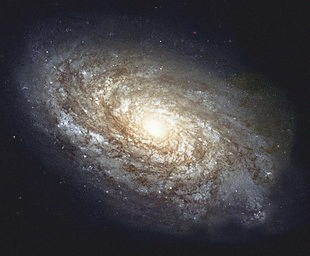

Jumlah Averaging: 100, PSNR: 27.37 dB


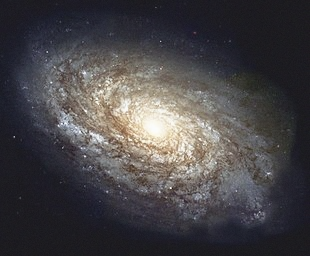

In [2]:
import glob
from math import log10, sqrt


# Fungsi untuk menghitung PSNR antara dua gambar
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # Jika MSE adalah 0, gambar identik
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Membaca gambar asli (tanpa noise)
original = cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/galaxy.jpg')

# List untuk menyimpan gambar dengan noise
cv_img = []

# Membaca semua gambar noise dalam folder
for img_path in glob.glob('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img_path)
    cv_img.append(n)

# List jumlah averaging yang ingin diuji
averaging_counts = [5, 10, 20, 40, 80, 100]

for count in averaging_counts:
    if count > len(cv_img):
        print(f"Tidak cukup gambar untuk average {count} kali.")
        continue

    # Melakukan average denoising
    averaged_image = np.zeros(cv_img[0].shape, np.float32)

    for i in range(count):
        averaged_image += cv_img[i].astype(np.float32)  # Tambahkan citra noise

    averaged_image /= count  # Rata-rata nilai piksel
    averaged_image = np.clip(averaged_image, 0, 255)  # Pastikan nilai di rentang 0-255
    averaged_image = averaged_image.astype(np.uint8)  # Konversi ke uint8

    # Menghitung PSNR
    psnr_value = PSNR(original, averaged_image)

    # Menampilkan hasil citra dan nilai PSNR
    print(f"Jumlah Averaging: {count}, PSNR: {psnr_value:.2f} dB")
    cv2_imshow(averaged_image)

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.

*   Nilai PSNR yang lebih tinggi menunjukkan bahwa gambar hasil penggabungan lebih mendekati kualitas gambar asli, sehingga gambar hasil tampak lebih bersih dan memiliki noise yang lebih sedikit.



Image Masking

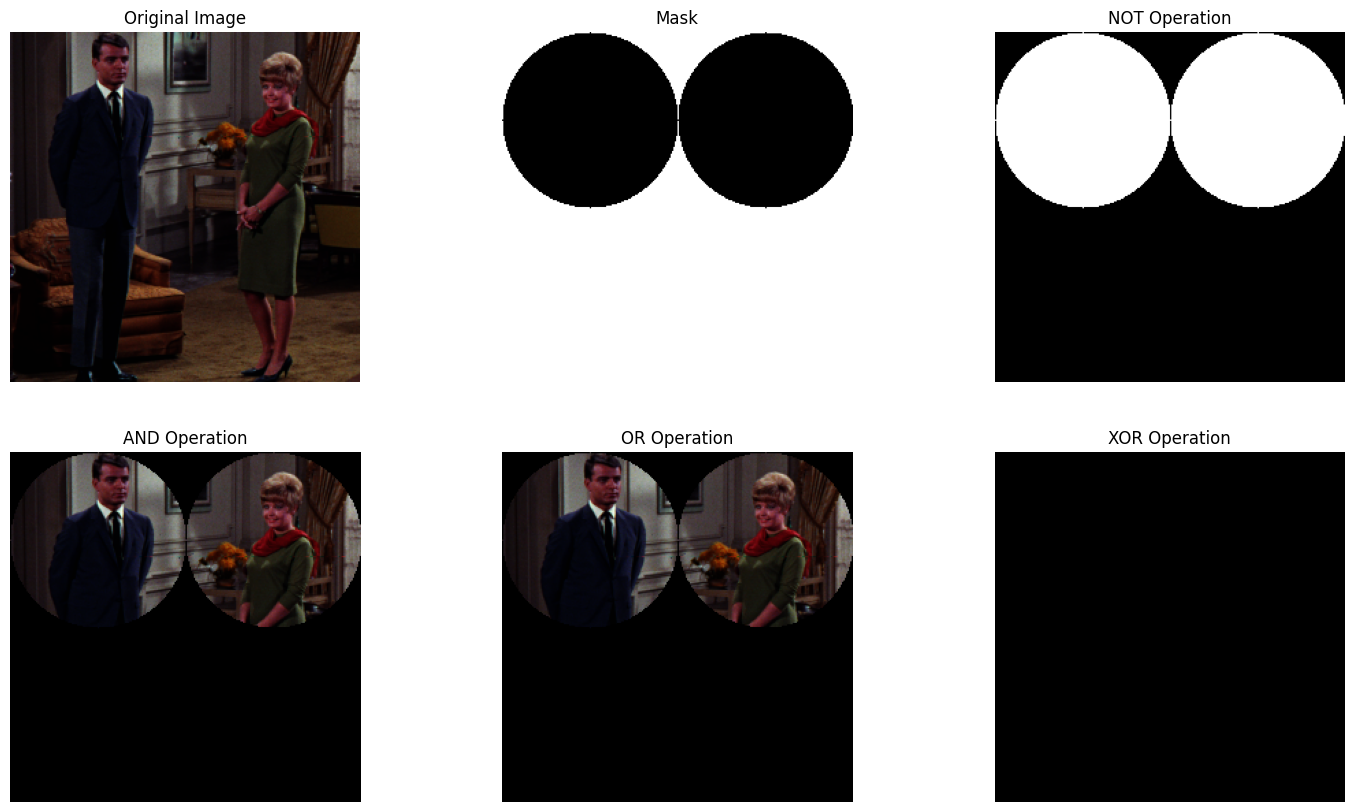

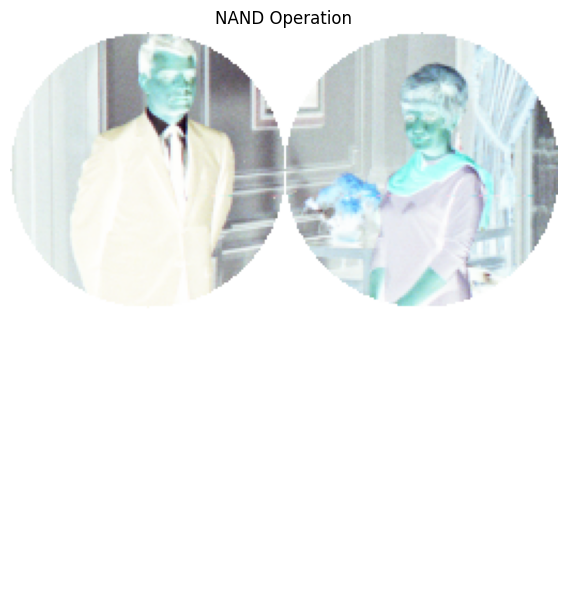

In [8]:
import matplotlib.pyplot as plt

# Membaca gambar input
imgInput = cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/couple.tiff')

# Buat mask
mask = np.ones(imgInput.shape[:2], dtype=np.uint8) * 255
cv.circle(mask, (imgInput.shape[1]//4, imgInput.shape[0]//4), min(imgInput.shape[0]//4, imgInput.shape[1]//4), 0, -1)
cv.circle(mask, (3*imgInput.shape[1]//4, imgInput.shape[0]//4), min(imgInput.shape[0]//4, imgInput.shape[1]//4), 0, -1)

# Operator bitwise
not_mask = cv.bitwise_not(mask)
and_mask = cv.bitwise_and(imgInput, imgInput, mask=not_mask)
or_mask = cv.bitwise_or(imgInput, imgInput, mask=not_mask)
xor_mask = cv.bitwise_xor(imgInput, imgInput, mask=not_mask)
nand_mask = cv.bitwise_not(and_mask)

# Membuat subplots untuk setiap gambar dan memberi judul operasi
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Menampilkan gambar asli
axes[0, 0].imshow(cv.cvtColor(imgInput, cv.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Menampilkan mask
axes[0, 1].imshow(mask, cmap='gray')
axes[0, 1].set_title('Mask')
axes[0, 1].axis('off')

# Menampilkan hasil operator NOT
axes[0, 2].imshow(cv.cvtColor(not_mask, cv.COLOR_BGR2RGB))
axes[0, 2].set_title('NOT Operation')
axes[0, 2].axis('off')

# Menampilkan hasil operator AND
axes[1, 0].imshow(cv.cvtColor(and_mask, cv.COLOR_BGR2RGB))
axes[1, 0].set_title('AND Operation')
axes[1, 0].axis('off')

# Menampilkan hasil operator OR
axes[1, 1].imshow(cv.cvtColor(or_mask, cv.COLOR_BGR2RGB))
axes[1, 1].set_title('OR Operation')
axes[1, 1].axis('off')

# Menampilkan hasil operator XOR
axes[1, 2].imshow(cv.cvtColor(xor_mask, cv.COLOR_BGR2RGB))
axes[1, 2].set_title('XOR Operation')
axes[1, 2].axis('off')

# Menampilkan hasil operator NAND
fig2, ax_nand = plt.subplots(1, 1, figsize=(6, 6))
ax_nand.imshow(cv.cvtColor(nand_mask, cv.COLOR_BGR2RGB))
ax_nand.set_title('NAND Operation')
ax_nand.axis('off')

plt.tight_layout()
plt.show()

Tuliskan hasil analisa anda

AND
Operasi bitwise AND antara gambar dan masker. Hanya piksel yang di dalam lingkaran yang akan terlihat, sedangkan piksel di luar lingkaran akan menjadi hitam.

NOT
Operasi bitwise NOT pada gambar dan masker, kemudian bitwise AND hasilnya. Ini mengakibatkan gambar yang sepenuhnya terbalik dengan lingkaran yang terbalik, menghasilkan efek yang tidak diinginkan.

OR
Operasi bitwise OR antara gambar dan masker. Ini menggabungkan gambar asli dengan lingkaran putih dari masker, menyebabkan area di luar lingkaran menjadi terpengaruh oleh masker.

NAND
Operasi bitwise NAND antara gambar dan masker. Hasilnya adalah gambar yang hanya menampilkan area yang terbalik dari gambar asli di luar lingkaran masker.

XOR
Operasi bitwise XOR antara gambar dan masker. Hasilnya adalah gambar yang menunjukkan area di dalam lingkaran masker yang berbeda dari gambar asli, sedangkan area di luar lingkaran masker akan menjadi hitam atau terpengaruh dengan cara lain.